# Sample code for Question 1

This notebook shows how you can use the provided Python function to pull player stats from an online website.
This function lives in a custom package that is provided to you in this repository.
You are encouraged to leverage this package as a skeleton and add all of your reusable code, functions, etc. into relevant modules.
This makes collaboration much easier as the package could be seen as a "single source of truth" to pull data, create visualizations, etc. rather than relying on a jumble of notebooks.
You can still run into trouble if branches are not frequently merged as work progresses, so try to not let your branches diverge too much.

In [1]:
from ift6758.data import get_player_stats

If the above doesn't work for you, make sure you've installed the repo as specified in the readme file. 
Essentially you must make sure that your environment is setup (either through conda or virtualenv), and then install it using:

```bash
pip install -e /path/to/repo 
```

The nice thing using this approach is if you have your environment activated, you can import modules from anywhere on your system!

In [2]:
df = get_player_stats(2016, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2016_goalies.html'...


If you're curious, this function uses the `pd.read_html()` method ([doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)), which internally uses [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) to parse HTML data.

In [3]:
df.head()

,Rk,Player,Age,Tm,GP,GS,W,L,T/O,GA,...,MIN,QS,QS%,RBS,GA%-,GSAA,G,A,PTS,PIM
0,1,Jake Allen,25,STL,47,44,26,15,3,101,...,2583,26,.591,6,94,6.28,0,0,0,0
1,2,Frederik Andersen,26,ANA,43,37,22,9,7,88,...,2298,24,.649,5,95,4.46,0,1,1,2
2,3,Craig Anderson,34,OTT,60,60,31,23,5,161,...,3477,31,.517,8,99,2.05,0,2,2,0
3,4,Richard Bachman,28,VAN,1,1,1,0,0,3,...,60,0,.000,0,NaN,NaN,0,0,0,0
4,5,Niklas Bäckström,37,CGY,4,3,2,2,0,13,...,233,2,.667,1,NaN,NaN,0,0,0,0


# Warm Up

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.dpi'] = 100 

*Q 1.1* We’ll try to explore goaltenders and consider who was the best goaltender of the *2017-2018* season.

In [7]:
df = get_player_stats(2016, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2016_goalies.html'...


Proposed feature

In [8]:
# proposed metric: SV% * log(1+GP) * GAA
df['new'] = np.log(1 + df['GP'].astype("float")) * df['SV%'].astype("float") * df['GAA'].astype("float")
df.sort_values(by="new", ascending = False, inplace = True)
print(df)

    Rk               Player Age   Tm  GP  GS   W   L T/O   GA  ...  QS    QS%  \
2    3       Craig Anderson  34  OTT  60  60  31  23   5  161  ...  31   .517   
84  87      Semyon Varlamov  27  COL  57  57  27  25   3  148  ...  25   .439   
35  36         Jonas Hiller  33  CGY  26  23   9  11   1   79  ...   7   .304   
13  14          Mike Condon  25  MTL  55  51  21  25   6  141  ...  24   .471   
72  74          Tuukka Rask  28  BOS  64  62  31  22   8  157  ...  34   .548   
..  ..                  ...  ..  ...  ..  ..  ..  ..  ..  ...  ...  ..    ...   
14  15       Pheonix Copley  24  STL   1   0   0   0   0    1  ...   0    NaN   
52  53     Charlie Lindgren  22  MTL   1   1   1   0   0    2  ...   1  1.000   
50  51     Michael Leighton  34  CHI   1   0   0   0   0    1  ...   0    NaN   
29  30  Kristers Gudlevskis  23  TBL   1   1   0   0   1    1  ...   1  1.000   
19  20       Chris Driedger  21  OTT   1   0   0   0   0    0  ...   0    NaN   

   RBS GA%-    GSAA  G  A P

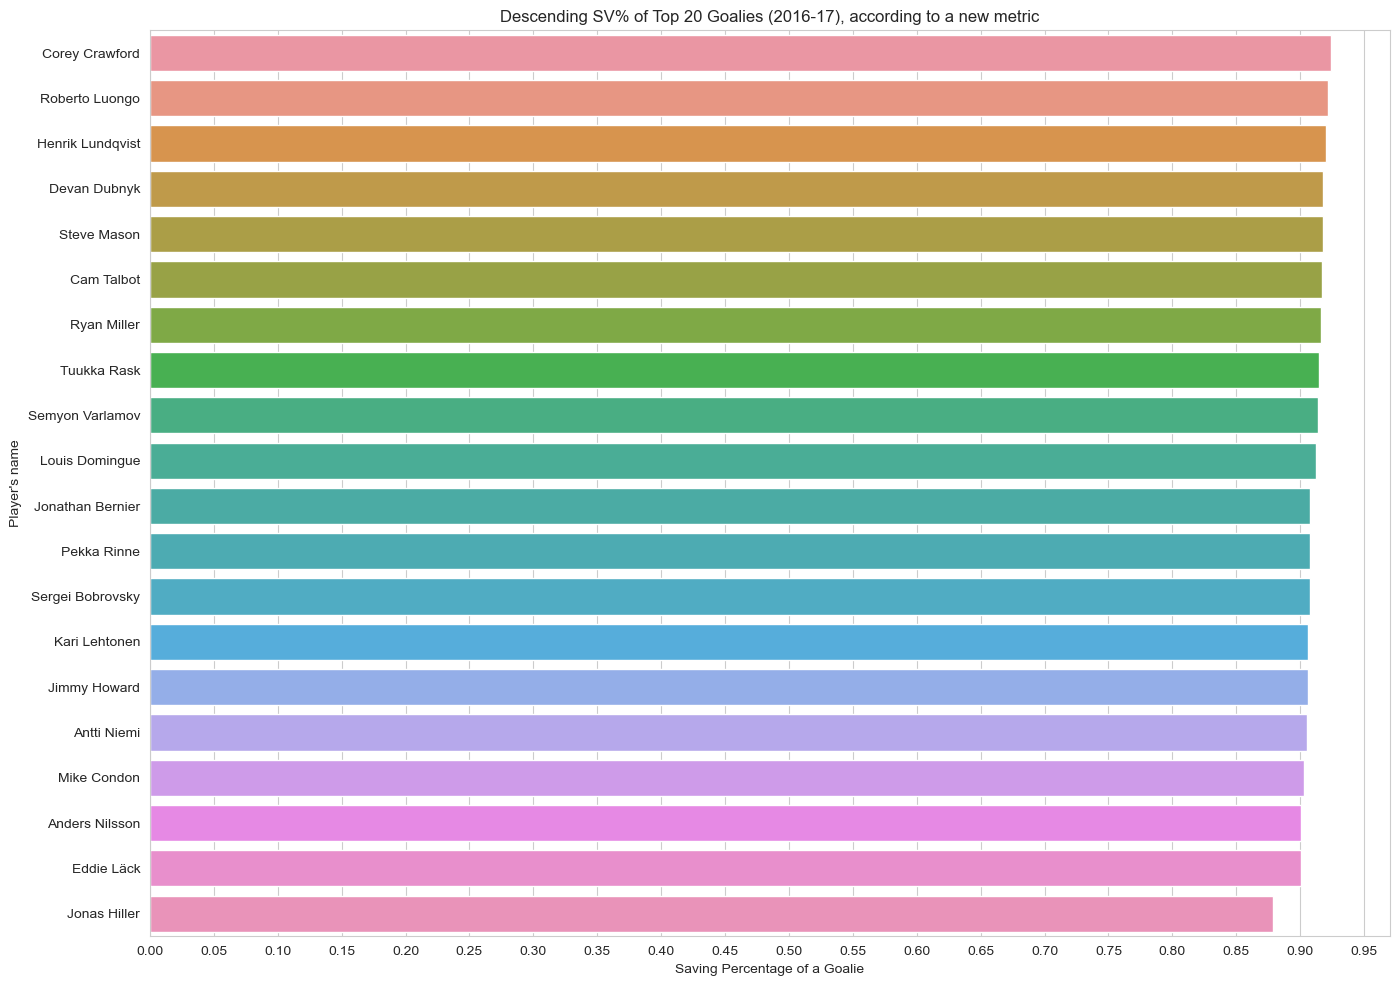

In [9]:
df = df.iloc[1:21, :]

df.sort_values(by="SV%", ascending = False, inplace = True)

df['Player'] = df['Player'].astype('string')
df['SV%'] = df['SV%'].astype('float64')

sns.set_style("whitegrid")

hf = plt.figure()
hf.set_size_inches( (16,12) )

hf = sns.barplot(y = 'Player', x = 'SV%', data = df)

hf.set_xticks(np.arange(0, 1, 0.05))

hf.title.set_text("Descending SV% of Top 20 Goalies (2016-17), according to a new metric")

hf.set_xlabel('Saving Percentage of a Goalie')
hf.set_ylabel("Player's name")

fig = hf.get_figure()
fig.savefig("goalie_stats_2016.png")

In [10]:
df = get_player_stats(2017, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2017_goalies.html'...


In [11]:
# proposed metric: SV% * log(1+GP) * GAA
df['new'] = np.log(1 + df['GP'].astype("float")) * df['SV%'].astype("float") * df['GAA'].astype("float")
df.sort_values(by="new", ascending = False, inplace = True)
print(df)

    Rk               Player Age   Tm  GP  GS   W   L T/O   GA  ...  QS   QS%  \
61  66          Petr Mrazek  24  DET  50  44  18  21   9  145  ...  19  .432   
80  85           Mike Smith  34  ARI  55  55  19  26   9  156  ...  27  .491   
65  70          Antti Niemi  33  DAL  37  30  12  12   4   95  ...  14  .467   
34  38    Connor Hellebuyck  23  WPG  56  53  26  19   4  146  ...  25  .472   
69  74       Calvin Pickard  24  COL  50  48  15  31   2  140  ...  21  .438   
..  ..                  ...  ..  ...  ..  ..  ..  ..  ..  ...  ...  ..   ...   
11  14        Jack Campbell  25  LAK   1   0   0   0   0    0  ...   0   NaN   
63  68     Alex Nedeljkovic  21  CAR   1   0   0   0   0    0  ...   0   NaN   
85  90      Dustin Tokarski  27  ANA   1   0   0   0   0    0  ...   0   NaN   
29  33  Kristers Gudlevskis  24  TBL   1   0   0   0   0    0  ...   0   NaN   
1    2          Jorge Alves  38  CAR   1   0   0   0   0    0  ...   0   NaN   

   RBS GA%-    GSAA  G  A PTS PIM      

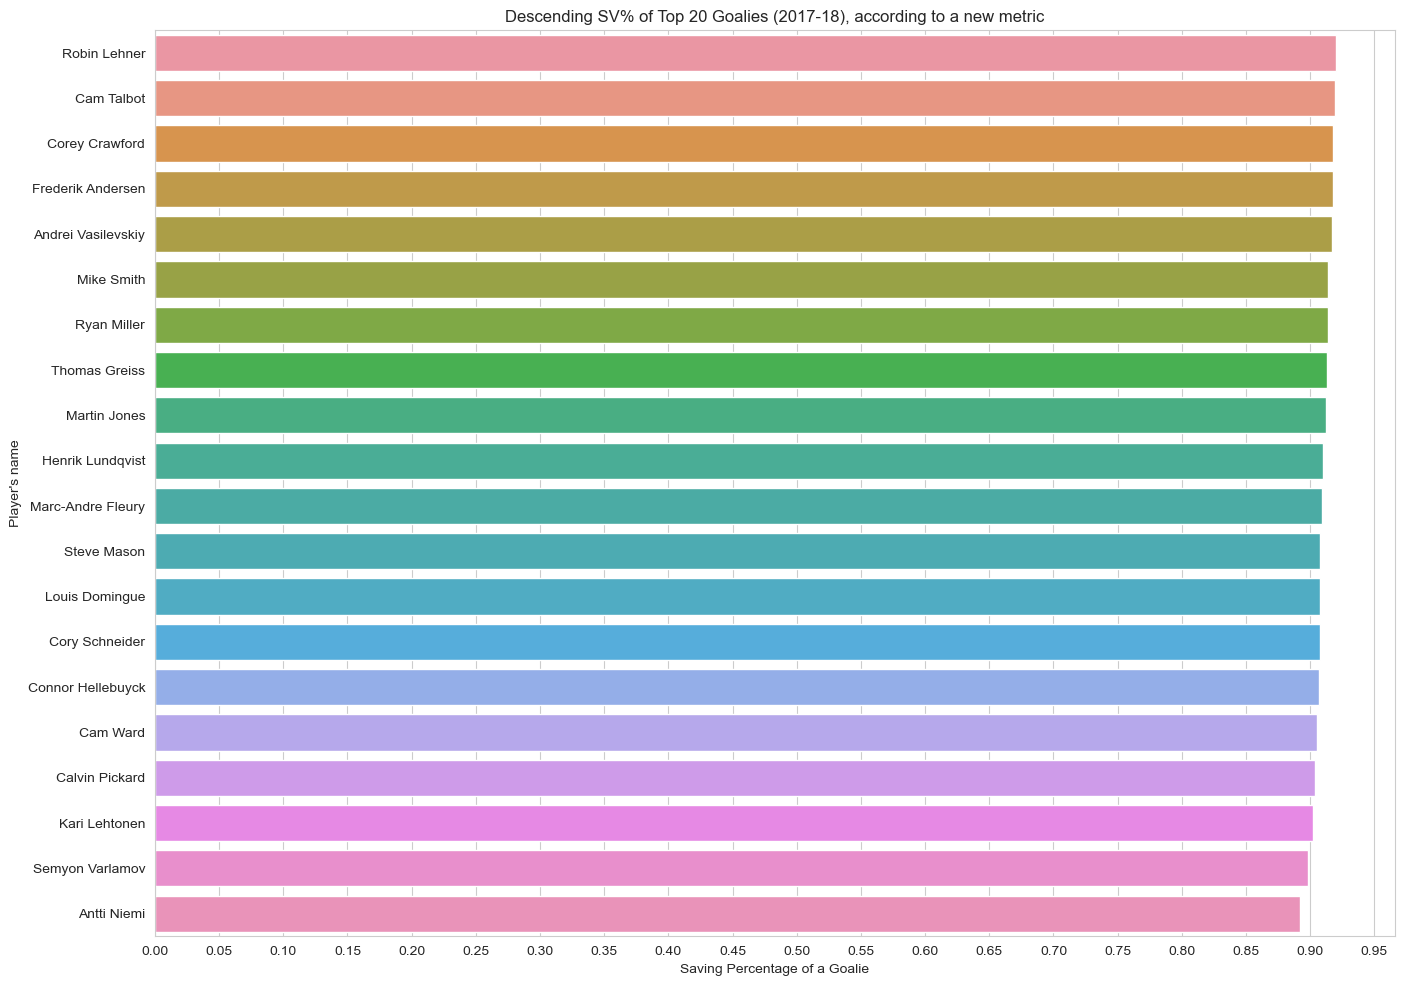

In [12]:
df = df.iloc[1:21, :]

df.sort_values(by="SV%", ascending = False, inplace = True)

df['Player'] = df['Player'].astype('string')
df['SV%'] = df['SV%'].astype('float64')

sns.set_style("whitegrid")

hf = plt.figure()
hf.set_size_inches( (16,12) )

hf = sns.barplot(y = 'Player', x = 'SV%', data = df)

hf.set_xticks(np.arange(0, 1, 0.05))

hf.title.set_text("Descending SV% of Top 20 Goalies (2017-18), according to a new metric")

hf.set_xlabel('Saving Percentage of a Goalie')
hf.set_ylabel("Player's name")

fig = hf.get_figure()
fig.savefig("goalie_stats_2017.png")

# Data Acquisition

download raw data from https://statsapi.web.nhl.com/api/v1/game/[GAME_ID]/feed/live/
manual load into dataframe

Example usage shown and commented below

In [24]:
#imports
from ift6758.data.functions import loadstats
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ipywidgets as widgets
from IPython.display import display
import plotly.express as px
import pandas as pd
import json
import numpy as np

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:

#preload and download from web if not acquired (set to false to download all data)
downloaded = True
if not downloaded:
    datayear = 2016
    while datayear <= 2020:
        loadstats(datayear,'./data/')
        datayear += 1
    
#outputs games that aren't played up to 7 in playoffs or max games in regular season
dfs = loadstats(2019,'./data/')
# print(df2019.iloc[:,1270])
# print(df2019['2019020001'])

size of data in regular season: 1271
Error code: 404 at gameID:2019030007. Game not found.
Error code: 404 at gameID:2019030017. Game not found.
Error code: 404 at gameID:2019030026. Game not found.
Error code: 404 at gameID:2019030036. Game not found.
Error code: 404 at gameID:2019030046. Game not found.
Error code: 404 at gameID:2019030056. Game not found.
Error code: 404 at gameID:2019030066. Game not found.
Error code: 404 at gameID:2019030076. Game not found.
Error code: 404 at gameID:2019030086. Game not found.
Error code: 404 at gameID:2019030096. Game not found.
size of data in regular season & playoffs: 1428


In [15]:
# playbyplay shown
pd.DataFrame.from_dict(dfs['2019020001']['liveData']['plays']['allPlays']).head()

,result,about,coordinates,players,team
0,"{'event': 'Game Scheduled', 'eventCode': 'TOR1...","{'eventIdx': 0, 'eventId': 1, 'period': 1, 'pe...",{},NaN,NaN
1,"{'event': 'Period Ready', 'eventCode': 'TOR5',...","{'eventIdx': 1, 'eventId': 5, 'period': 1, 'pe...",{},NaN,NaN
2,"{'event': 'Period Start', 'eventCode': 'TOR8',...","{'eventIdx': 2, 'eventId': 8, 'period': 1, 'pe...",{},NaN,NaN
3,"{'event': 'Faceoff', 'eventCode': 'TOR9', 'eve...","{'eventIdx': 3, 'eventId': 9, 'period': 1, 'pe...","{'x': 0.0, 'y': 0.0}","[{'player': {'id': 8475166, 'fullName': 'John ...","{'id': 10, 'name': 'Toronto Maple Leafs', 'lin..."
4,"{'event': 'Goal', 'eventCode': 'TOR10', 'event...","{'eventIdx': 4, 'eventId': 10, 'period': 1, 'p...","{'x': 85.0, 'y': -1.0}","[{'player': {'id': 8480801, 'fullName': 'Brady...","{'id': 9, 'name': 'Ottawa Senators', 'link': '..."


In [16]:
# raw data shown in first entry
dfs

,2019020001,2019020002,2019020003,2019020004,2019020005,2019020006,2019020007,2019020008,2019020009,2019020010,...,2019030325,2019030326,2019030327,2019030411,2019030412,2019030413,2019030414,2019030415,2019030416,2019030417
copyright,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...,NHL and the NHL Shield are registered trademar...
gamePk,2019020001,2019020002,2019020003,2019020004,2019020005,2019020006,2019020007,2019020008,2019020009,2019020010,...,2019030325,2019030326,2019030327,2019030411,2019030412,2019030413,2019030414,2019030415,2019030416,2019030417
link,/api/v1/game/2019020001/feed/live,/api/v1/game/2019020002/feed/live,/api/v1/game/2019020003/feed/live,/api/v1/game/2019020004/feed/live,/api/v1/game/2019020005/feed/live,/api/v1/game/2019020006/feed/live,/api/v1/game/2019020007/feed/live,/api/v1/game/2019020008/feed/live,/api/v1/game/2019020009/feed/live,/api/v1/game/2019020010/feed/live,...,/api/v1/game/2019030325/feed/live,/api/v1/game/2019030326/feed/live,/api/v1/game/2019030327/feed/live,/api/v1/game/2019030411/feed/live,/api/v1/game/2019030412/feed/live,/api/v1/game/2019030413/feed/live,/api/v1/game/2019030414/feed/live,/api/v1/game/2019030415/feed/live,/api/v1/game/2019030416/feed/live,/api/v1/game/2019030417/feed/live
metaData,"{'wait': 10, 'timeStamp': '20191106_204348', '...","{'wait': 10, 'timeStamp': '20191106_204355'}","{'wait': 10, 'timeStamp': '20191106_204404'}","{'wait': 10, 'timeStamp': '20191106_204412'}","{'wait': 10, 'timeStamp': '20191106_204420'}","{'wait': 10, 'timeStamp': '20191106_204429'}","{'wait': 10, 'timeStamp': '20191106_204438'}","{'wait': 10, 'timeStamp': '20191106_204446'}","{'wait': 10, 'timeStamp': '20191106_204455'}","{'wait': 10, 'timeStamp': '20191106_204502'}",...,"{'wait': 10, 'timeStamp': '20200915_145520'}","{'wait': 10, 'timeStamp': '20200915_030341'}","{'wait': 10, 'timeStamp': '20200915_030342'}","{'wait': 10, 'timeStamp': '20200921_213742'}","{'wait': 10, 'timeStamp': '20200922_040018'}","{'wait': 10, 'timeStamp': '20200924_053615'}","{'wait': 10, 'timeStamp': '20201012_000003'}","{'wait': 10, 'timeStamp': '20200927_185956'}","{'wait': 10, 'timeStamp': '20200929_092143'}","{'wait': 10, 'timeStamp': '20200922_000343'}"
gameData,"{'game': {'pk': 2019020001, 'season': '2019202...","{'game': {'pk': 2019020002, 'season': '2019202...","{'game': {'pk': 2019020003, 'season': '2019202...","{'game': {'pk': 2019020004, 'season': '2019202...","{'game': {'pk': 2019020005, 'season': '2019202...","{'game': {'pk': 2019020006, 'season': '2019202...","{'game': {'pk': 2019020007, 'season': '2019202...","{'game': {'pk': 2019020008, 'season': '2019202...","{'game': {'pk': 2019020009, 'season': '2019202...","{'game': {'pk': 2019020010, 'season': '2019202...",...,"{'game': {'pk': 2019030325, 'season': '2019202...","{'game': {'pk': 2019030326, 'season': '2019202...","{'game': {'pk': 2019030327, 'season': '2019202...","{'game': {'pk': 2019030411, 'season': '2019202...","{'game': {'pk': 2019030412, 'season': '2019202...","{'game': {'pk': 2019030413, 'season': '2019202...","{'game': {'pk': 2019030414, 'season':

In [17]:
# number of regular season games
print(dfs.iloc[:,0]['metaData']['playoffIndex'])
# number of total games
print(dfs.shape[1])

1271
1428


# Interactive Debugging Widget

Use the sliders below to see the play by play for each games

In [18]:
def coordToImg (x, y):
    #transforms coordinate from data to image coordinates

    #data coordinates [-42.5,42.5,-100 ,100]  85 by 200
    y = y*(467/85)
    x = x*(1100/200)
    #scale [-233.5,233.5,-550,550]
    
    y = y+233.5
    x = x + 550
    #shift [0,467,0,1100]

    return int(x), int(y)

In [19]:
#define the playoff index & game size
index = dfs.iloc[:,0]['metaData']['playoffIndex']
gamesize = dfs.shape[1]
# number of plays in game 1 regular season
game1plays = len(dfs.iloc[:,0]['liveData']['plays']['allPlays'])

#game type selector
wType = widgets.RadioButtons(
        options=['Regular', 'PlayOffs'],
        value='Regular', # Defaults to 'Regular'
        #layout={'width': 'max-content'}, # If the items' names are long
        description='Game Type:',
        disabled=False
    )
    
#game selector
wGameIndex = widgets.IntSlider(
    value=0,
    min=0,
    max=index-1,
    step=1,
    description='Game Index:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

#play selector
wPlays = widgets.IntSlider(
        value=0,
        min=0,
        max=game1plays-1,
        step=1,
        description='Play Index:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
)


output2 = widgets.Output()
#debug
#display(wType,wGameIndex,wPlays,output2)

# Define a function that updates the content of GameIndex based on GameType
def on_value_changeT(change):
    if wType.value == 'Regular':
        wGameIndex.min = 0
        wGameIndex.max = max(index-1,0)
        wGameIndex.value=0
    elif wType.value == 'PlayOffs':
        wGameIndex.max = max(gamesize-1,0)
        wGameIndex.min = min(index,0)
        wGameIndex.value = min(wGameIndex.max,wGameIndex.min)
    else:
        print('Game Type Selector Error!')
    #debug
    # with output2:
    #     print(change['new'])
    #     print(wGameIndex.min)
    #     print(wGameIndex.max)

wType.observe(on_value_changeT, names='value')

# Define a function that updates the number of Plays based on GameIndex
def on_value_changeI(change):
    wPlays.value = 0
    wPlays.max = max(len(dfs.iloc[:,wGameIndex.value]['liveData']['plays']['allPlays'])-1,0)
    #debug 
    # with output2:
    #     print(change['new'])
    #     print(wPlays.max)
    #     print(wPlays.value)
        
wGameIndex.observe(on_value_changeI, names='value')

#functions that plots the plays depending on the widget selection
def plotPlay(wTypei, wGameIndexi,wPlaysi):
    
    coordinates = {}
    #print useful info here
    print(f'Gametype: {wTypei}, Game Index: {wGameIndexi}, Play Index: {wPlaysi}')
    print(f'gameID: {dfs.iloc[:,wGameIndexi]["gamePk"]}, time: {dfs.iloc[:,wGameIndexi]["gameData"]["datetime"]["dateTime"]}')
    print(f'Away: {dfs.iloc[:,wGameIndexi]["gameData"]["teams"]["away"]["abbreviation"]} vs {dfs.iloc[:,wGameIndexi]["gameData"]["teams"]["home"]["abbreviation"]} :Home')
    
    #try to find coordinates of plays
    try:
        coordinates = dfs.iloc[:,wGameIndexi]['liveData']['plays']['allPlays'][wPlaysi]['coordinates']
    except Exception as ex:
        print(ex)
    

    #change coordinate system and show image
    img = mpimg.imread('./figures/nhl_rink.png')
    imgplot = plt.imshow(img)#, extent = [-100 ,100,-42.5,42.5])
    
    #if coordinates exist then plot on image
    if coordinates:
        x, y = coordToImg(coordinates['x'],coordinates['y'])
        plt.plot(x,y,'yo', markersize=30)
        #plt.plot(coordinates['x'],coordinates['y'],'yo', markersize=30)
    plt.show()
    
    #print play info if it exist
    try:
        print(json.dumps(dfs.iloc[:,wGameIndexi]['liveData']['plays']['allPlays'][wPlaysi], ensure_ascii=False, indent=4))
    except Exception as ex:
        print(ex)
    
#widget initilizer
widgets.interact(plotPlay,  
    #game type selector
    wTypei = wType,    
    #game selector
    wGameIndexi = wGameIndex,    
    #play selector
    wPlaysi = wPlays,
)



interactive(children=(RadioButtons(description='Game Type:', options=('Regular', 'PlayOffs'), value='Regular')…

<function __main__.plotPlay(wTypei, wGameIndexi, wPlaysi)>

<b><h2>Simple Visualizations (25%) </h2> </b> 

Lets now use the tidied data to create some simple distributions over the aggregate data.

Questions 

1) Produce a histogram OR BARPLOT of shot types over all teams in a season of your choosing. Overlay the number of goals overtop the number of shots. What appears to be the most dangerous type of shot? The most common type of shot? Add this figure and discussion to your blog post.

2) What is the relationship between the distance a shot was taken and the chance it was a goal? Produce a figure for each season between 2018-19 to 2020-21 to answer this, and add it to your blog post along with a couple of sentences describing your figure. Has there been much change over the past three seasons? Note: there are multiple ways to show this relationship! If your figure tells the correct story, you will get full marks.

3) Combine the information from the previous sections to produce a figure that shows the goal percentage (# goals / # shots) as a function of both distance from the net, and the category of shot types (you can pick a single season of your choice). Briefly discuss your findings; e.g. what might be the most dangerous types of shots?


<h1> Q5.1 </h1>

In [25]:
from ift6758.data.tidyData import tidyData
dfs_2018 = loadstats(2018,'./data/')
df_2018 = tidyData(dfs_2018)

#print(df_2019)
dfs_2019 = loadstats(2019,'./data/')
df_2019 = tidyData(dfs_2019)

dfs_2020 = loadstats(2020,'./data/')
df_2020 = tidyData(dfs_2020)


size of data in regular season: 1271
size of data in regular season & playoffs: 1376
size of data in regular season: 1271
Error code: 404 at gameID:2019030007. Game not found.
Error code: 404 at gameID:2019030017. Game not found.
Error code: 404 at gameID:2019030026. Game not found.
Error code: 404 at gameID:2019030036. Game not found.
Error code: 404 at gameID:2019030046. Game not found.
Error code: 404 at gameID:2019030056. Game not found.
Error code: 404 at gameID:2019030066. Game not found.
Error code: 404 at gameID:2019030076. Game not found.
Error code: 404 at gameID:2019030086. Game not found.
Error code: 404 at gameID:2019030096. Game not found.
size of data in regular season & playoffs: 1428
Error code: 404 at gameID:2020020869. Game not found.
size of data in regular season: 868
size of data in regular season & playoffs: 973


In [21]:
df2 = df_2019.groupby(['shotType'])['isGoal'].value_counts().reset_index(name='count')

In [22]:
df2 = df2.rename(columns={'count': 'Goal'})
print(df2)

       shotType  isGoal   Goal
0      Backhand   False   5422
1      Backhand    True    738
2     Deflected   False   1275
3     Deflected    True    229
4     Slap Shot   False  10371
5     Slap Shot    True    767
6     Snap Shot   False   9159
7     Snap Shot    True   1087
8        Tip-In   False   3389
9        Tip-In    True    678
10  Wrap-around   False    648
11  Wrap-around    True     52
12   Wrist Shot   False  38991
13   Wrist Shot    True   3802


In [23]:
df2 = df2[df2['isGoal'] == 1]
df2

,shotType,isGoal,Goal
1,Backhand,True,738
3,Deflected,True,229
5,Slap Shot,True,767
7,Snap Shot,True,1087
9,Tip-In,True,678
11,Wrap-around,True,52
13,Wrist Shot,True,3802


      shotType   Shot
0     Backhand   6160
1    Deflected   1504
2    Slap Shot  11138
3    Snap Shot  10246
4       Tip-In   4067
5  Wrap-around    700
6   Wrist Shot  42793


Text(0.5, 1.0, 'Stacked Bar Chart')

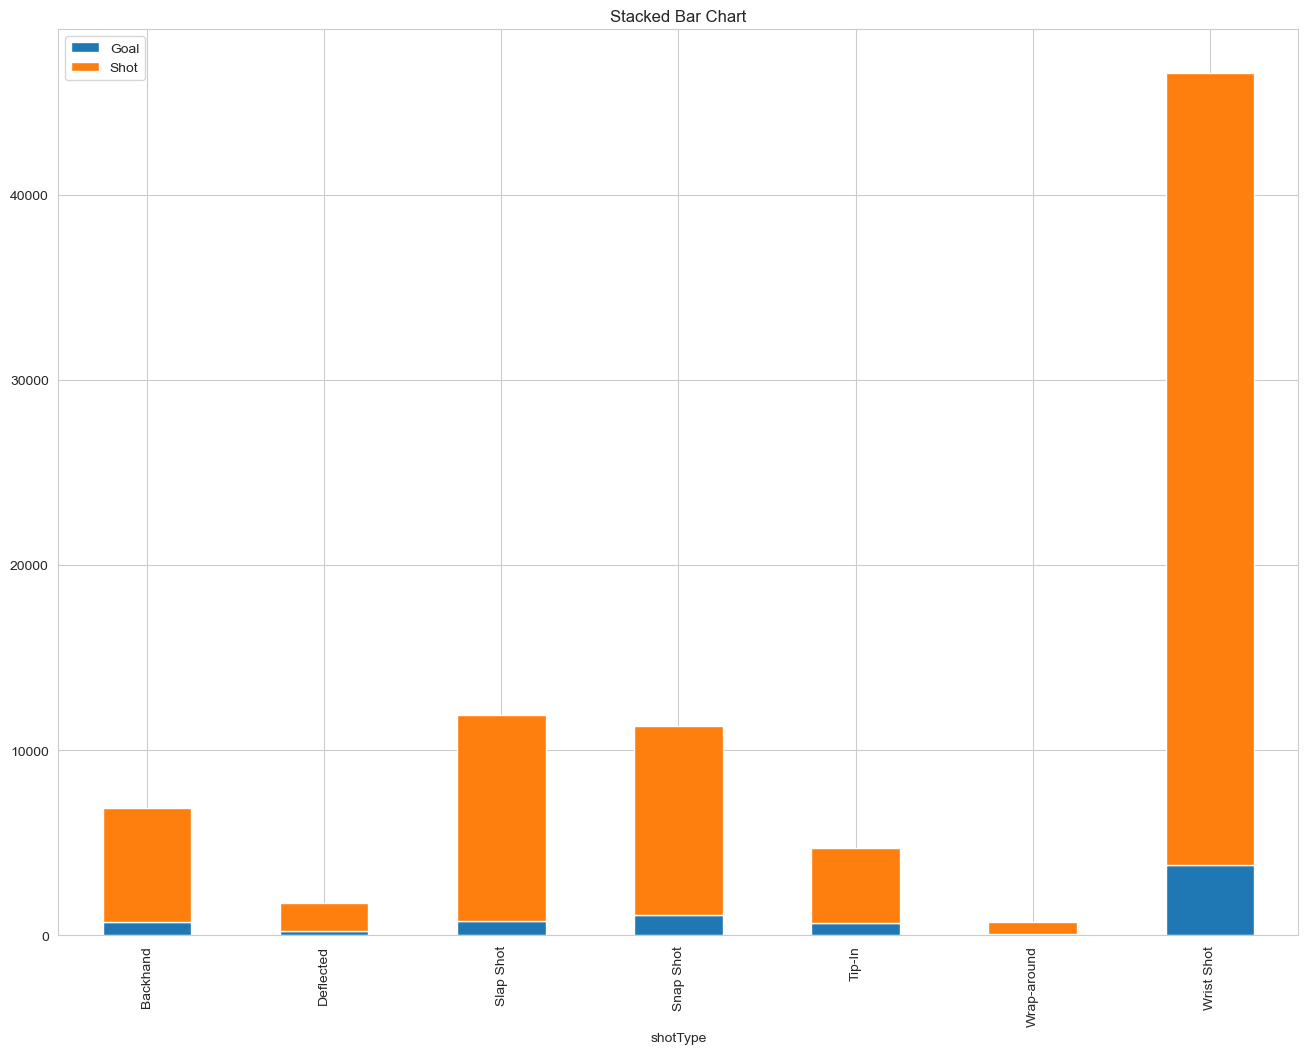

In [24]:
df3 = df_2019.groupby(['shotType'])['isGoal'].count().reset_index(name='count')
df3 = df3.rename(columns={'count': 'Shot'})
print(df3)

new_df = pd.merge(df2, df3, on='shotType')
new_df[['shotType',	'Goal', 'Shot']].plot(x="shotType", kind="bar", stacked=True)

plt.title('Stacked Bar Chart', fontdict=None, loc='center', pad=None)

In [25]:
# the most dangerous type of shot

percent = new_df['Goal']/(new_df['Goal']+new_df['Shot'])*100
print(percent)

0    10.698753
1    13.214080
2     6.442671
3     9.591459
4    14.288725
5     6.914894
6     8.159674
dtype: float64


<h1> Q5.2 </h1>

In [26]:
#df_2019 = df_2019.reset_index()
df_2019_new = df_2019[~df_2019['coordinates_x'].isna()]
df_2019_new= df_2019[~df_2019['coordinates_y'].isna()]

#print(df_2019_new[df_2019_new['coordinates_x'].isna()])
# print(df_2019_new.isna().sum())

df_2018_new = df_2018[~df_2018['coordinates_x'].isna()]
df_2018_new= df_2018[~df_2018['coordinates_y'].isna()]

# print(df_2018_new.isna().sum())

df_2020_new = df_2020[~df_2020['coordinates_x'].isna()]
df_2020_new= df_2020[~df_2020['coordinates_y'].isna()]

# print(df_2020_new.isna().sum())

In [27]:
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
def euclidean_distance(a,b,c): #b => 
    print(b)
    lst = []
    for i in b:
        if i < 0:
            x_dist = a[0]-i
        else:
            x_dist = -a[0]-i
        lst.append(x_dist)
    new_lst = pd.Series(lst)
    dst = np.sqrt((new_lst)**2 + (a[1]-c)**2)
    return dst
#print(df2)

opponent_coordinate = [-90,0]


#df_2018_new['Distance'] = euclidean_distance(opponent_coordinate, df_2018_new.coordinates_x.astype(float), df_2018_new.coordinates_y.astype(float))
df_2019_new['Distance'] = euclidean_distance(opponent_coordinate, df_2019_new.coordinates_x.astype(float), df_2019_new.coordinates_y.astype(float))
df_2020_new['Distance'] = euclidean_distance(opponent_coordinate, df_2020_new.coordinates_x.astype(float), df_2020_new.coordinates_y.astype(float))

# aa=0
# ab=0
# ac=0
# ad=0
# a=0
# b=0
# c=0
# d=0

# for i in np.array(df_2018_new[df_2018_new['isGoal'] == True]['Distance']):
#     if i > 10 and i<20:
#         aa+= 1
#     if i > 20 and i<30:
#         ab+= 1
#     if i > 30 and i<40:
#         ac+= 1
#     if i > 40 and i<50:
#         ad+= 1
#     if i > 50 and i < 60:
#         a+= 1
#     if i >60 and i< 70:
#         b+= 1
#     if i >70 and i <80:
#         c+= 1
#     if i>80 and i<90:
#         d+=1

# print(aa,ab,ac,ad,a,b,c,d, )
# lst = [aa,ab,ac,ad,a,b,c,d]

# xa = 0
# xb=0
# xc=0
# xd=0
# xe=0
# xf=0
# xg=0
# xh=0

# for i in np.array(df_2018_new[df_2018_new['isGoal'] == False]['Distance']):
#     if i > 10 and i<20:
#         xa+= 1
#     if i > 20 and i<30:
#         xb+= 1
#     if i > 30 and i<40:
#         xc+= 1
#     if i > 40 and i<50:
#         xd+= 1
#     if i > 50 and i < 60:
#         xe+= 1
#     if i >60 and i< 70:
#         xf+= 1
#     if i >70 and i <80:
#         xg+= 1
#     if i>80 and i<90:
#         xh+=1
# print(xa, xb, xc, xd, xe, xf,xg, xh )

# print(aa)
# print(aa+xa)
# prob_1 = aa/(aa+xa)
# prob_2 = ab/(ab+xb)
# prob_3 = ac/(ac+xc)
# prob_4 = ad/(ad+xd)
# prob_5 = a/(a+xe)
# prob_6 = b/(b+xf)
# prob_7 = c/(c+xg)
# prob_8 = d/(a+xh)
# lst = [prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8]

# import seaborn as sns
# sns.set_theme(style="whitegrid")
# ax = sns.barplot(x=['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90' ], y=lst, data=df_2018_new)
# ax.set_title('relationship between the distance a shot was taken and the chance it was a goal in season 2018-2019')
# ax.set(xlabel="Distance", ylabel = "isGoal")


0        85.0
1       -32.0
2        63.0
3       -59.0
4       -42.0
         ... 
76615   -59.0
76616   -81.0
76617    34.0
76618    31.0
76619    77.0
Name: coordinates_x, Length: 76619, dtype: float64
0       -74.0
1        49.0
2       -52.0
3        43.0
4       -53.0
         ... 
57729    57.0
57730    56.0
57731   -45.0
57732   -77.0
57733   -77.0
Name: coordinates_x, Length: 57734, dtype: float64


/var/folders/0t/3x9pw8y15wv301cvvgjgx9s00000gn/T/ipykernel_89526/236838513.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_new['Distance'] = euclidean_distance(opponent_coordinate, df_2019_new.coordinates_x.astype(float), df_2019_new.coordinates_y.astype(float))


1716 1443 1222 810 919 201 122 101
11096 12452 13585 10417 10542 4302 1044 1042
1716
12812


[Text(0.5, 0, 'Distance'), Text(0, 0.5, 'isGoal')]

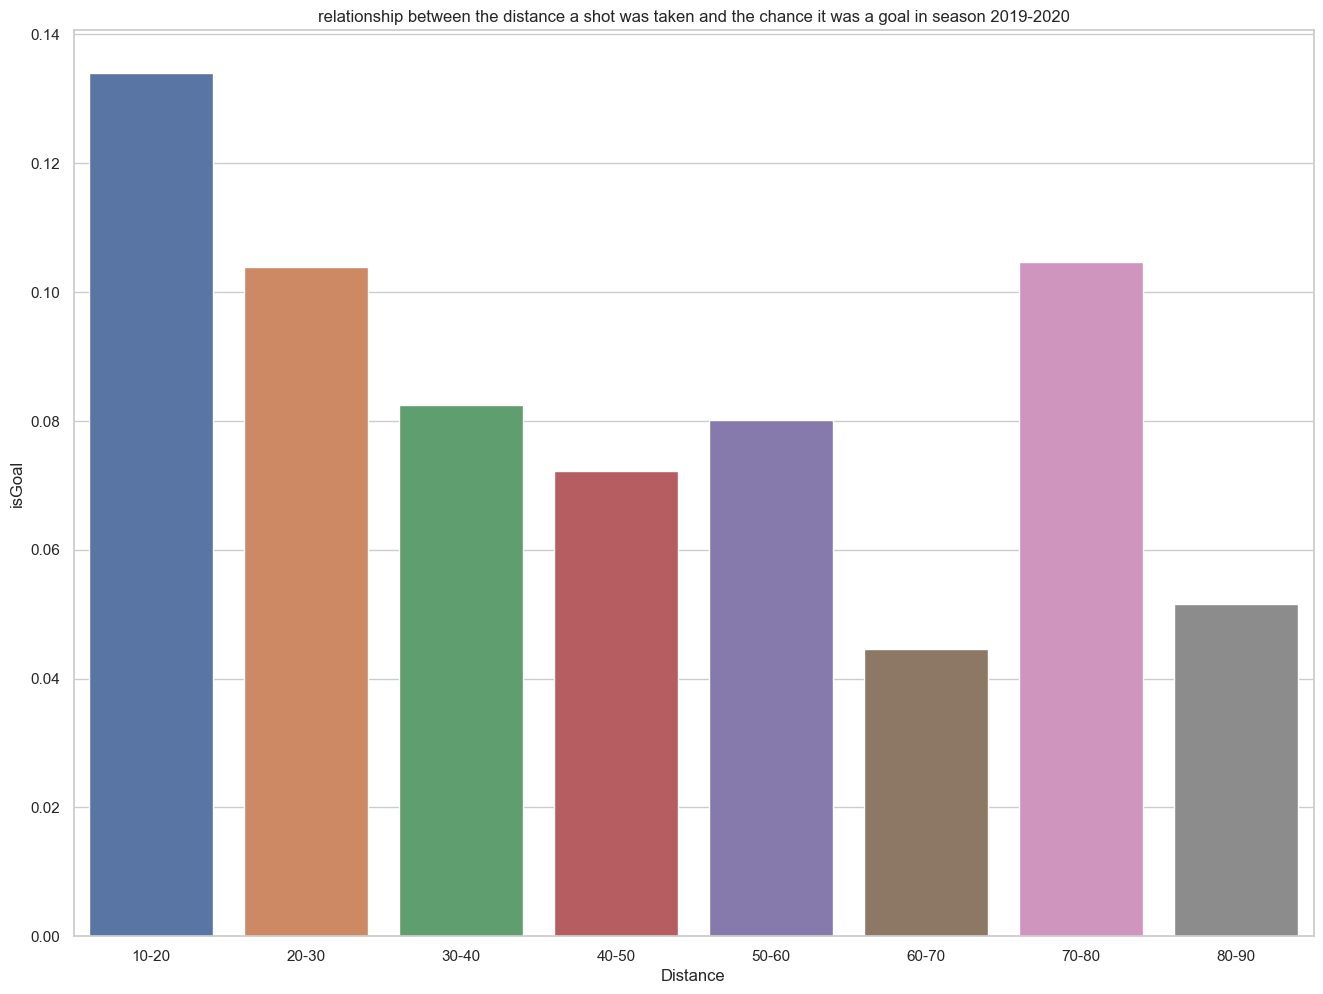

In [28]:
aa=0
ab=0
ac=0
ad=0
a=0
b=0
c=0
d=0

for i in np.array(df_2019_new[df_2019_new['isGoal'] == True]['Distance']):
    if i > 10 and i<20:
        aa+= 1
    if i > 20 and i<30:
        ab+= 1
    if i > 30 and i<40:
        ac+= 1
    if i > 40 and i<50:
        ad+= 1
    if i > 50 and i < 60:
        a+= 1
    if i >60 and i< 70:
        b+= 1
    if i >70 and i <80:
        c+= 1
    if i>80 and i<90:
        d+=1

print(aa,ab,ac,ad,a,b,c,d, )
lst = [aa,ab,ac,ad,a,b,c,d]

xa = 0
xb=0
xc=0
xd=0
xe=0
xf=0
xg=0
xh=0

for i in np.array(df_2019_new[df_2019_new['isGoal'] == False]['Distance']):
    if i > 10 and i<20:
        xa+= 1
    if i > 20 and i<30:
        xb+= 1
    if i > 30 and i<40:
        xc+= 1
    if i > 40 and i<50:
        xd+= 1
    if i > 50 and i < 60:
        xe+= 1
    if i >60 and i< 70:
        xf+= 1
    if i >70 and i <80:
        xg+= 1
    if i>80 and i<90:
        xh+=1
print(xa, xb, xc, xd, xe, xf,xg, xh )

print(aa)
print(aa+xa)
prob_1 = aa/(aa+xa)
prob_2 = ab/(ab+xb)
prob_3 = ac/(ac+xc)
prob_4 = ad/(ad+xd)
prob_5 = a/(a+xe)
prob_6 = b/(b+xf)
prob_7 = c/(c+xg)
prob_8 = d/(a+xh)
lst = [prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8]

import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90' ], y=lst, data=df_2019_new)
ax.set_title('relationship between the distance a shot was taken and the chance it was a goal in season 2019-2020')
ax.set(xlabel="Distance", ylabel = "isGoal")

1929 1091 735 360 261 96 23 44
9712 7984 8643 7751 8428 3634 692 700
1929
11641


[Text(0.5, 0, 'Distance'), Text(0, 0.5, 'isGoal')]

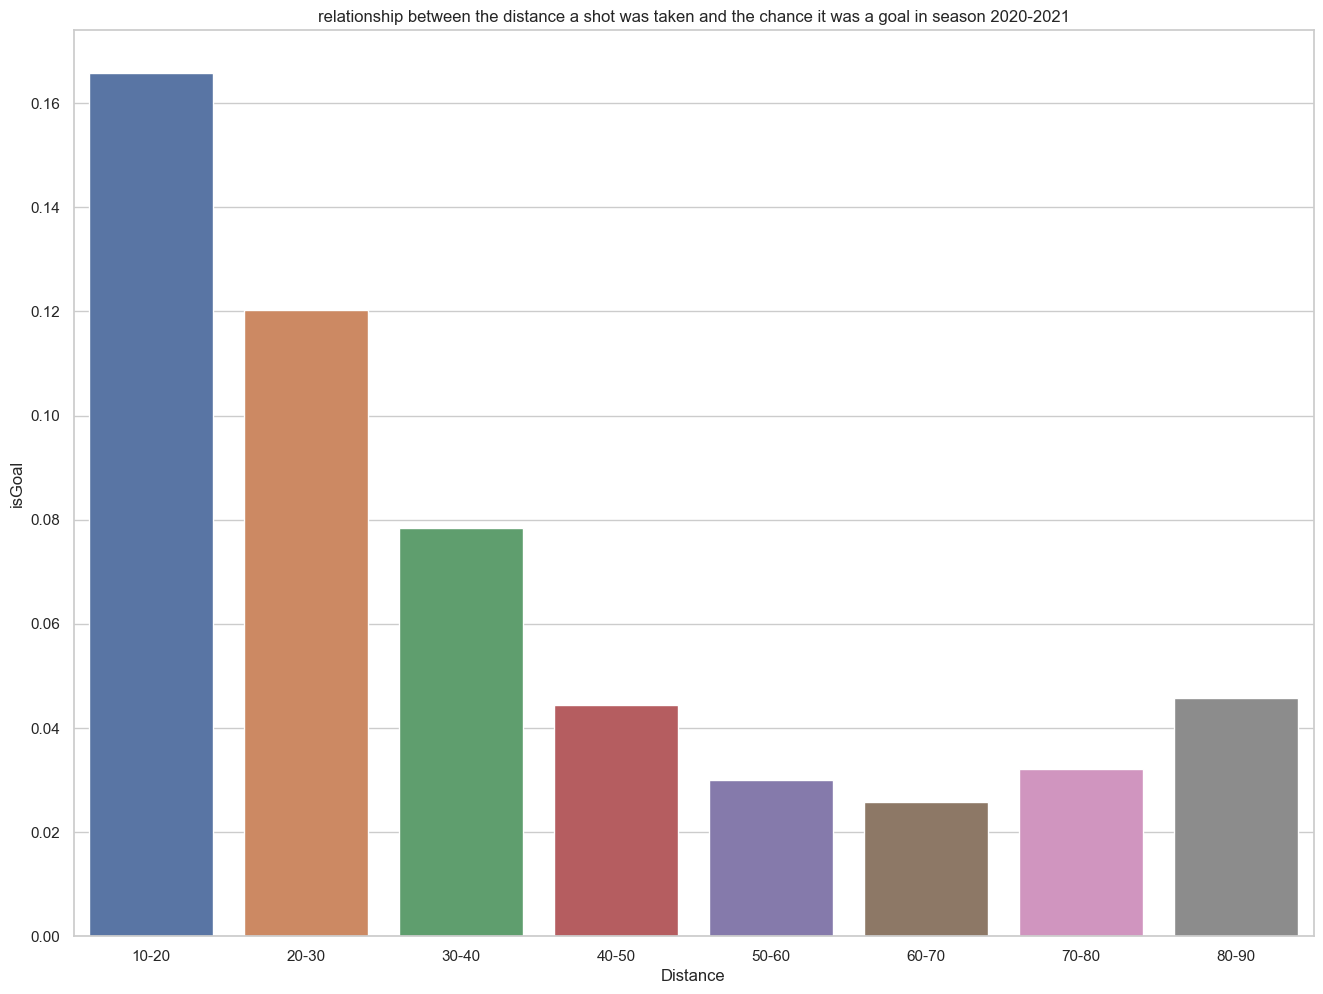

In [29]:
aa=0
ab=0
ac=0
ad=0
a=0
b=0
c=0
d=0

for i in np.array(df_2020_new[df_2020_new['isGoal'] == True]['Distance']):
    if i > 10 and i<20:
        aa+= 1
    if i > 20 and i<30:
        ab+= 1
    if i > 30 and i<40:
        ac+= 1
    if i > 40 and i<50:
        ad+= 1
    if i > 50 and i < 60:
        a+= 1
    if i >60 and i< 70:
        b+= 1
    if i >70 and i <80:
        c+= 1
    if i>80 and i<90:
        d+=1

print(aa,ab,ac,ad,a,b,c,d, )
lst = [aa,ab,ac,ad,a,b,c,d]

xa = 0
xb=0
xc=0
xd=0
xe=0
xf=0
xg=0
xh=0

for i in np.array(df_2020_new[df_2020_new['isGoal'] == False]['Distance']):
    if i > 10 and i<20:
        xa+= 1
    if i > 20 and i<30:
        xb+= 1
    if i > 30 and i<40:
        xc+= 1
    if i > 40 and i<50:
        xd+= 1
    if i > 50 and i < 60:
        xe+= 1
    if i >60 and i< 70:
        xf+= 1
    if i >70 and i <80:
        xg+= 1
    if i>80 and i<90:
        xh+=1
print(xa, xb, xc, xd, xe, xf,xg, xh )

print(aa)
print(aa+xa)
prob_1 = aa/(aa+xa)
prob_2 = ab/(ab+xb)
prob_3 = ac/(ac+xc)
prob_4 = ad/(ad+xd)
prob_5 = a/(a+xe)
prob_6 = b/(b+xf)
prob_7 = c/(c+xg)
prob_8 = d/(a+xh)
lst = [prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8]

import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=['10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90' ], y=lst, data=df_2020_new)
ax.set_title('relationship between the distance a shot was taken and the chance it was a goal in season 2020-2021')
ax.set(xlabel="Distance", ylabel = "isGoal")

<h1> Q5.3 </h1>

In [27]:
df_2019 = df_2019[~df_2019['coordinates_x'].isna()]
df_2019 = df_2019[~df_2019['coordinates_y'].isna()]

opponent_coordinate = [-90,0]

playerXYCoordDF = df_2019[["coordinates_x","coordinates_y"]]
playerXYCoordDF.head()

playerXY_DF = playerXYCoordDF.apply( lambda x : pd.Series( opponent_coordinate, index = ['opponent_x', 'opponent_y'] ), axis=1, result_type="expand")
playerXY_DF.head()

playerXY_DF2 = playerXYCoordDF.join(playerXY_DF)
display(playerXY_DF2)

# playerXY_DF3 
df_2019["Distance"]  = playerXY_DF2.apply( lambda row : np.sqrt((row.opponent_x - row.coordinates_x)**2 +  row.coordinates_y**2) if (row.coordinates_x < 0) else np.sqrt((-row.opponent_x - row.coordinates_x)**2 + row.coordinates_y**2), axis=1 , result_type="expand" )

#df_2019["Distance"] = playerXY_DF3.apply(np.sqrt)
display(df_2019)

print( df_2019["Distance"].min(), df_2019["Distance"].max())

# https://stackoverflow.com/questions/34317149/pandas-groupby-with-bin-counts
bins = list(range(0,110,10))

groups =  df_2019.groupby(["shotType", pd.cut(df_2019.Distance, bins)])
shotsMap = groups.size().unstack()
print("shotsMap: ", shotsMap.shape)

goalsDF = df_2019[df_2019.isGoal == True ].reset_index()
display(goalsDF)

groups = goalsDF.groupby(["shotType", pd.cut(goalsDF.Distance, bins)])
goalsMap = groups.size().unstack()
print("goalsMap: ", goalsMap.shape)

#df_2019['Distance'] = euclidean_distance(opponent_coordinate, df_2019.coordinates_x.astype(float), df_2019.coordinates_y.astype(float))

goalsRatioDF = goalsMap.applymap( lambda x : x * 100 ).div(shotsMap).fillna(0.0)
display(goalsRatioDF)

,coordinates_x,coordinates_y,opponent_x,opponent_y
0,85.0,-1.0,-90,0
1,-32.0,-2.0,-90,0
2,63.0,-6.0,-90,0
3,-59.0,-20.0,-90,0
4,-42.0,-29.0,-90,0
...,...,...,...,...
76615,-59.0,-24.0,-90,0
76616,-81.0,3.0,-90,0
76617,34.0,-6.0,-90,0
76618,31.0,10.0,-90,0


,game_id,event_idx,period,periodTime,teamInfo,isGoal,shotType,coordinates_x,coordinates_y,shooter,goalie,emptyNet,strength,awayTeam,homeTeam,Distance
0,2019020001,4,1,00:25,Ottawa Senators,True,Tip-In,85.0,-1.0,Brady Tkachuk,Frederik Andersen,False,EVEN,Ottawa Senators,Toronto Maple Leafs,5.099020
1,2019020001,12,1,01:31,Toronto Maple Leafs,False,Snap Shot,-32.0,-2.0,Morgan Rielly,Craig Anderson,False,NA,Ottawa Senators,Toronto Maple Leafs,58.034473
2,2019020001,19,1,03:23,Ottawa Senators,False,Snap Shot,63.0,-6.0,Dylan DeMelo,Frederik Andersen,False,NA,Ottawa Senators,Toronto Maple Leafs,27.658633
3,2019020001,22,1,03:56,Toronto Maple Leafs,False,Wrist Shot,-59.0,-20.0,Morgan Rielly,Craig Anderson,False,NA,Ottawa Senators,Toronto Maple Leafs,36.891733
4,2019020001,27,1,04:47,Toronto Maple Leafs,False,Slap Shot,-42.0,-29.0,Tyson Barrie,Craig Anderson,False,NA,Ottawa Senators,Toronto Maple Leafs,56.080300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76615,2019030416,319,3,16:01,Tampa Bay Lightning,False,Snap Shot,-59.0,-24.0,Anthony Cirelli,Anton Khudobin,False,NA,Tampa Bay Lightning,Dallas Stars,39.204592
76616,2019030416,326,3,17:20,Tampa Bay Lightning,False,Wrist Shot,-81.0,3.0,Blake Coleman,Anton Khudobin,False,NA,Tampa Bay Lightning,Dallas Stars,9.486833
76617,2019030416,333,3,18:50,Dallas Stars,False,Snap Shot,34.0,-6.0,John Klingberg,Andrei Vasilevskiy,False,NA,Tampa Bay Lightning,Dallas Stars,56.320511
76618,2019030416,341,3,19:27,Dallas Stars,False,Wrist Shot,31.0,10.0,John Klingberg,Andrei Vasilevskiy,False,NA,Tampa Bay Lightning,Dallas Stars,59.841457


1.0 98.48857801796105
shotsMap:  (7, 10)


,index,game_id,event_idx,period,periodTime,teamInfo,isGoal,shotType,coordinates_x,coordinates_y,shooter,goalie,emptyNet,strength,awayTeam,homeTeam,Distance
0,0,2019020001,4,1,00:25,Ottawa Senators,True,Tip-In,85.0,-1.0,Brady Tkachuk,Frederik Andersen,False,EVEN,Ottawa Senators,Toronto Maple Leafs,5.099020
1,29,2019020001,145,2,02:20,Toronto Maple Leafs,True,Wrist Shot,86.0,0.0,Frederik Gauthier,Craig Anderson,False,EVEN,Ottawa Senators,Toronto Maple Leafs,4.000000
2,34,2019020001,165,2,04:42,Toronto Maple Leafs,True,Slap Shot,84.0,2.0,Trevor Moore,Craig Anderson,False,EVEN,Ottawa Senators,Toronto Maple Leafs,6.324555
3,35,2019020001,172,2,05:51,Ottawa Senators,True,Wrist Shot,-83.0,-6.0,Scott Sabourin,Frederik Andersen,False,EVEN,Ottawa Senators,Toronto Maple Leafs,9.219544
4,37,2019020001,181,2,08:02,Toronto Maple Leafs,True,Wrist Shot,83.0,5.0,Auston Matthews,Craig Anderson,False,EVEN,Ottawa Senators,Toronto Maple Leafs,8.602325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7356,76534,2019030415,259,3,03:38,Tampa Bay Lightning,True,Slap Shot,-34.0,-20.0,Mikhail Sergachev,Anton Khudobin,False,EVEN,Dallas Stars,Tampa Bay Lightning,59.464275
7357,76548,2019030415,322,3,13:15,Dallas Stars,True,Wrist Shot,83.0,4.0,Joe Pavelski,Andrei Vasilevskiy,False,EVEN,Dallas Stars,Tampa Bay Lightning,8.062258
7358,76568,2019030415,525,5,09:23,Dallas Stars,True,Wrist Shot,80.0,2.0,Corey Perry,Andrei Vasilevskiy,False,EVEN,Dallas Stars,Tampa Bay Lightning,10.198039
7359,76576,2019030416,62,1,12:23,Tampa Bay Lightning,True,Wrist Shot,-80.0,0.0,Brayden Point,Anton Khudobin,False,PPG,Tampa Bay Lightning,Dallas Stars,10.000000


goalsMap:  (7, 10)


Distance,"(0, 10]","(10, 20]","(20, 30]","(30, 40]","(40, 50]","(50, 60]","(60, 70]","(70, 80]","(80, 90]","(90, 100]"
shotType,,,,,,,,,,
Backhand,19.316493,13.742001,5.035971,2.272727,3.517588,1.282051,0.000000,3.225806,2.380952,2.439024
Deflected,24.683544,14.084507,14.473684,10.344828,14.634146,16.666667,0.000000,0.000000,0.000000,0.000000
Slap Shot,25.694444,29.139073,15.615142,11.218169,6.838768,4.020221,3.003161,1.886792,0.675676,2.631579
Snap Shot,23.868313,23.385301,15.429600,9.069021,4.751620,2.583026,2.777778,0.000000,10.416667,2.500000
Tip-In,24.827586,15.669643,17.037037,9.302326,0.000000,16.279070,3.658537,1.282051,0.000000,0.000000
Wrap-around,8.177172,4.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Wrist Shot,22.320169,17.304786,11.051840,6.532856,3.456116,2.146660,2.172312,3.526093,3.176796,5.079365


<AxesSubplot:xlabel='Distance', ylabel='shotType'>

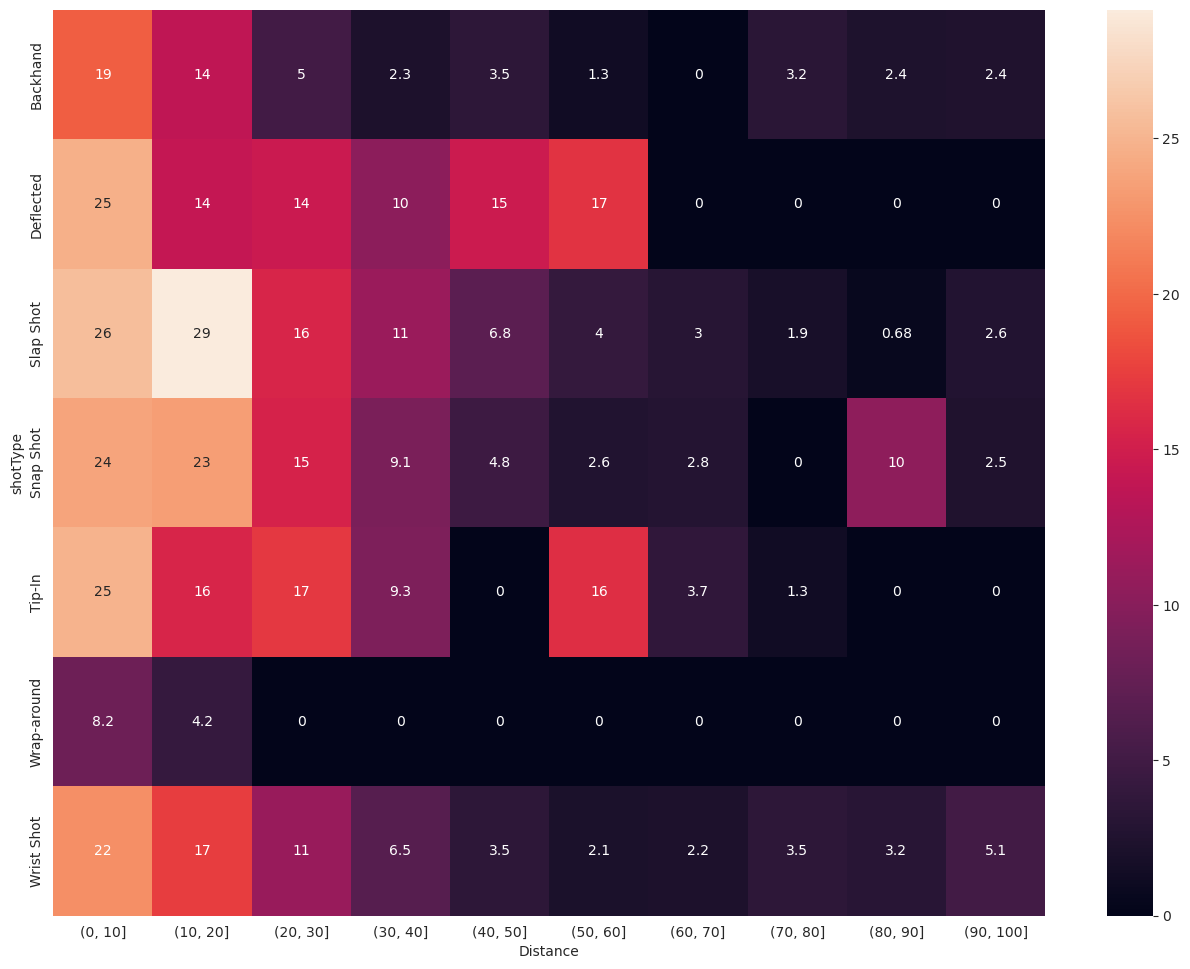

In [28]:
sns.heatmap(goalsRatioDF, annot = True)

<h1> Q6 </h1>


In [33]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
# check seaborn version here
import seaborn as sns

print('seaborn version: ',sns.__version__)

import plotly.graph_objects as go

from ipywidgets import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline

from ift6758.data.tidyData import tidyData
from ift6758.data.functions import *

from scipy.ndimage import gaussian_filter

#import image of hockey ring
from PIL import Image
img = Image.open('./figures/nhl_rink.png')

seaborn version:  0.11.2


In [34]:
#img transforms
print(img.size[1])
nimg = img.crop((0, 0, (img.size[0]/2), img.size[1]))
nimg= nimg.rotate(-90, expand=True)
#nimg.show()

467


# widget and interactions

In [ ]:
#pre-load all years may crash if low on memory (used for widgets)
nYear = 5 #define number of years of games to import (from 2016) eg. 5= 2016-2021
binned_gridi,dfs_tidyi,Teamnamesi = load_genGridi(nYear)

In [ ]:
#initilize values
sType ='Both'
year = 2016
contourN = 12
selected_team='Toronto Maple Leafs'

#print(Teamnames) 
#load only one year
#binned_grid,dfs_tidy,Teamnames = load_genGrid(year, sType)

team_binned_grid = genTeamGrid(binned_gridi[str(year)],dfs_tidyi[str(year)],Teamnamesi[str(year)],selected_team)
#team_binned_grid = genTeamGrid(binned_grid,dfs_tidy,Teamnames,selected_team)
colorscale,minG,maxG = setContour(team_binned_grid,contourN)


#year selector
wYear = widgets.Dropdown(
    options=list(range(2016,2016+nYear)),
    value=2016,
    description='Year: ',
)

#Team selector
wTeam = widgets.Dropdown(
    description='Team: ',
    value='Toronto Maple Leafs',
    options=Teamnamesi[str(year)]
)

#game type selector
wType = widgets.Dropdown(
    options=['Both','Regular', 'PlayOffs'],
    value='Both',
    description='Game Type:',
)

#contour selector
wCont = widgets.IntSlider(
        value=12,
        min=1,
        max=20,
        step=1,
        description='Contours:',
        disabled=False,
        continuous_update=False,
        orientation='horizontal',
        readout=True,
        readout_format='d'
)

container = widgets.HBox(children=[wYear, wType])
container2 = widgets.HBox([wTeam, wCont])

# Assign an empty figure widget with two traces
trace1 =go.Contour(
        z=team_binned_grid,
        connectgaps=False,
        colorbar=dict(title='Excess shots vs Avg',
                      titleside='right',nticks=contourN,tickfont_size=10
                     ),
        colorscale = colorscale,
        contours=dict(
            start=minG,
            end=maxG,
            size=(maxG-minG)/contourN,
       ),
       line_smoothing=0.85
    )

g = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        title={
                                'text': f"Shot rates for {wTeam.value} in {wYear.value} vs Avg",
                                # 'y':0,
                                'x':0.5,
                                'xanchor': 'center',
                                'yanchor': 'top'},
                        xaxis_title="Width of the Arena",
                        yaxis_title="Length of the Arena from Center",
                        images=[dict(
                                source=nimg,
                                xref="x",
                                yref="y",
                                x=0,
                                y=100,
                                sizex=85,
                                sizey=100,
                                sizing="stretch",
                                opacity=0.2,
                                layer="above"
                        )]
                    )
                   )

# Define a function that updates the content of GameIndex based on GameType 
# REQUIRED TO RUN FIRST--> load_genGridi()
def response(change):
    #grab input values
    
    
    #if year changed then load new year data
    if change['new'] in list(range(2016,2016+nYear)) :
        #load new data
        #update team options
        wTeam.options = Teamnamesi[str(wYear.value)]
        wTeam.value = wTeam.options[0]
        team_binned_grid = genTeamGrid(binned_gridi[str(wYear.value)],
                                       dfs_tidyi[str(wYear.value)],
                                       wTeam.options,
                                       wTeam.value)
        colorscale,minG,maxG = setContour(team_binned_grid,wCont.value)

    #if seasontype changed then load new year stats
    #currently doesn't work for Regular or PlayOffs seperatly
    elif change['new'] in ['Both','Regular', 'PlayOffs']:
        pass
        #load new data
        #update team options
        wTeam.options = Teamnamesi[str(wYear.value)]
        wTeam.value = wTeam.options[0]
        team_binned_grid = genTeamGrid(binned_gridi[str(wYear.value)],
                                       dfs_tidyi[str(wYear.value)],
                                       wTeam.options,
                                       wTeam.value)
        colorscale,minG,maxG = setContour(team_binned_grid,wCont.value)

    #if teamname changed then load new team stats
    elif change['new'] in wTeam.options:
        #load new data
        #update team options
        team_binned_grid = genTeamGrid(binned_gridi[str(wYear.value)],
                                       dfs_tidyi[str(wYear.value)],
                                       wTeam.options,
                                       wTeam.value)
        colorscale,minG,maxG = setContour(team_binned_grid,wCont.value)
        
    #if contour number changed then update contours
    elif change['new'] in list(range(1,21)):
        team_binned_grid = genTeamGrid(binned_gridi[str(wYear.value)],
                                       dfs_tidyi[str(wYear.value)],
                                       wTeam.options,
                                       wTeam.value)
        colorscale,minG,maxG = setContour(team_binned_grid,wCont.value)
        
    else:
        raise Exception('selection out of bounds')
    
    #debug
    #with output2:
    #    print(change['new'],wType.value,wYear.value,wTeam.value,wCont.value)

    
    with g.batch_update():
            g.data[0].z = team_binned_grid
            g.data[0].colorbar = dict(title='Excess shots vs Avg',
                      titleside='right',nticks=wCont.value,tickfont_size=10
                     )
            g.data[0].colorscale = colorscale
            g.data[0].contours = dict(
                                    start=minG,
                                    end=maxG,
                                    size=(maxG-minG)/wCont.value,
                                    )
            g.layout.title={'text': f"Shot rates for {wTeam.value} in {wYear.value} vs Avg",
                                # 'y':0,
                                'x':0.5,
                                'xanchor': 'center',
                                'yanchor': 'top'}
            
            
wType.observe(response, names='value')
wTeam.observe(response, names='value')
wYear.observe(response, names='value')
wCont.observe(response, names='value')

output2 = widgets.Output()

display(widgets.VBox([container, container2,output2, g]))



In [ ]:
import plotly.graph_objects as go
import pandas as pd

#button dependent interaction hard without dash

#initilize values
sType ='Both'
year = 2016 #2020
contourN = 12
selected_team='Colorado Avalanche'
selected_teami=['Tampa Bay Lightning','Buffalo Sabres']

#generate all maps for all teams in selections
team_binned_grid = genTeamGrid(binned_gridi[str(2016)],dfs_tidyi[str(2016)],Teamnamesi[str(2016)],selected_team)
colorscale,minG,maxG = setContour(team_binned_grid,contourN)

team_binned_grid2 = genTeamGrid(binned_gridi[str(2020)],dfs_tidyi[str(2020)],Teamnamesi[str(2020)],selected_team)
colorscale2,minG2,maxG2 = setContour(team_binned_grid2,contourN)


team_binned_gridi = [team_binned_grid, team_binned_grid2]
colorscalei = [colorscale, colorscale2]
minGi = [minG, minG2]
maxGi = [maxG, maxG2]
namei = [f'{selected_team} in 2016',f'{selected_team} in 2020']

#append other games
for team in selected_teami:
    for i in range(2018,2021):
        team_binned_gridi.append(genTeamGrid(binned_gridi[str(i)],dfs_tidyi[str(i)],Teamnamesi[str(i)],team))
        colorscale,minG,maxG = setContour(team_binned_gridi[-1],12)
        colorscalei.append(colorscale)
        minGi.append(minG)
        maxGi.append(maxG)
        namei.append(f'{team} in {i}')

buttons = []
for i,d in enumerate(team_binned_gridi):
    visible = [False]*len(team_binned_gridi)
    visible[i] = True,
    name = namei[i]
    buttons.append(dict(label=namei[i],
                        method="update",
                        args=[{"visible":visible},
                              {"title":f"Shot rates for {namei[i]} vs Avg"}]))

updatemenus = [{'active':0, 
                "buttons":buttons, 
                "x":0,
                "y":1.4,
                "xanchor":'left',
                "yanchor":'top'}]


fig = go.Figure(layout=dict(updatemenus=updatemenus))

for i in range(len(team_binned_gridi)):
    fig.add_trace(go.Contour(
        z=team_binned_gridi[i],
        connectgaps=False,
        colorbar=dict(title='Excess shots vs Avg',
                      titleside='right',nticks=12,tickfont_size=10
                     ),
        colorscale = colorscalei[i],
        visible = True if i == 0 else False,
        contours=dict(
            start=minGi[i],
            end=maxGi[i],
            size=(maxGi[i]-minGi[i])/12,
       ),
       line_smoothing=0.85
    ))


fig.add_layout_image(dict(
                                source=nimg,
                                xref="x",
                                yref="y",
                                x=0,
                                y=100,
                                sizex=85,
                                sizey=100,
                                sizing="stretch",
                                opacity=0.2,
                                layer="above"
                        )
)
                 
fig.update_layout(title={
                        'text': "Shot rates for Colorado Avalanche in 2016 vs Avg",
                        #y':0.9,
                        'x':0.5,
                        'xanchor': 'center',
                        'yanchor': 'top'},
                        xaxis_title="Width of the Arena",
                        yaxis_title="Length of the Arena from Center",
)

fig.show()